# Исследование данных об аренде самокатов

## Введение

**Краткое описание проекта:** В нашем распоряжении данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить несколько гипотез, которые могут помочь бизнесу вырасти.

**Цель проекта:** Проверить статистические гипотезы, а как следствие получить информацию, которая может помочь сервису аренды самокатов стать лучше и вырасти как бизнес.

**Описание данных:** В основных данных есть информация о пользователях, их поездках и подписках (3 датасета).

1. **Пользователи — `users_go.csv`**

- `user_id` - уникальный идентификатор пользователя

- `name` - имя пользователя

- `age` - возраст

- `city` - город

- `subscription_type` - тип подписки (free, ultra)


2. **Поездки — `rides_go.csv`**

- `user_id` - уникальный идентификатор пользователя

- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)

- `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

- `date` - дата совершения поездки

3. **Подписки — `subscriptions_go.csv`**

- `subscription_type` - тип подписки

- `minute_price` - стоимость одной минуты поездки по данной подписке

- `start_ride_price` - стоимость начала поездки

- `subscription_fee` - стоимость ежемесячного платежа

**План работ:**
- Изучить данные
- Провести предобработку данных: обработать пропуски, устранить дубликаты, обработать типы данных
- Провести исследовательский анализ данных (описать и визуализируйте общую информацию о пользователях и поездках в следующих разрезах: частота встречаемости городов; соотношение пользователей с подпиской и без подписки; возраст пользователей; расстояние, которое пользователь преодолел за одну поездку; продолжительность поездок).
- Объединить данные в один датафрейм
- Рассчитать выручку
- Проверить гипотезы
- Построить распределения

## Загрузка и первоначальное изучение данных

In [1]:
# Импорты
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Загрузка с Google Drive
users_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1QzCHinXigi14LxXMoYwH1i4QYxzECYUD', sep=',')
rides_df = pd.read_csv('https://drive.google.com/uc?export=download&id=11rEIIP6AXCXD5F6GVTLbHiDn0oR1GCij', sep=',')
subscriptions_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1DG_L3qx3AFq1PDh6GWuspi5goa9yomwr', sep=',')

Выведем на экран первые 10 строк датафрейма `users_df`

In [3]:
users_df.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Изучим также общую информацию о данных

In [4]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


В данных отсутствуют пропуски, типы данных приведены к оптимальным.

Выведем на экран первые 10 строк датафрейма `rides_df`

In [5]:
rides_df.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Изучим также общую информацию о данных

In [6]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


В данных отсутствуют пропуски, но тип данных столбца `'date'` необходимо будет перевести в тип `datetime`, это одна из будущих подзадач следующего раздела - Предобработка данных.

Перейдем к последнему датасету - `'subscriptions_df'`. Выведем весь датафрейм на экран (в нем всего 2 строки)

In [7]:
subscriptions_df.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Выведем общую информацию

In [8]:
subscriptions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Типы данных оптимальны, пропуски отсутствуют.

## Предобработка данных

В наших данных отсутствуют пропуски, поэтому начать предобработку данных можно с преобразования типов данных

### Обработка типов данных

Приведем столбец `date` датафрейма `rides_df` в формат `datetime` pandas.

In [9]:
rides_df['date'] = pd.to_datetime(rides_df['date'], format='%Y-%m-%d')
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Тип данных успешно изменен на необходимый нам. 

### Добавление вспомогательных столбцов

Добавим столбец `month`, который будет хранить информацию о месяце, в котором состоялась поездка.

In [10]:
rides_df['month'] = pd.DatetimeIndex(rides_df['date']).month
rides_df.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Столбец добавлен. Проверим, данные за какой период у нас в распоряжении

In [11]:
print('Начальная дата:', rides_df['date'].unique().min(), '\nКонечная дата:', rides_df['date'].unique().max())

Начальная дата: 2021-01-01 00:00:00 
Конечная дата: 2021-12-30 00:00:00


В нашем распоряжении данные за 2021 год.

### Обработка пропущенных значений и дубликатов

В ходе изучения данных (Раздел 1), был получен вывод об **отсутствии пропусков в данных**. Перейдем к устранению дубликатов.

#### Обработка дубликатов `users_df`
Начнем с `users_df`: проверим, могли ли в данных возникнуть неявные дубликаты: посмотрим на уникальные значения столбцов `'name'`

In [12]:
print(sorted(users_df['name'].unique()))

['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра', 'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина', 'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий', 'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина', 'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём', 'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия', 'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника', 'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Влад', 'Влада', 'Владимир', 'Владислав', 'Владислава', 'Всеволод', 'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей', 'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила', 'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий', 'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена', 'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар', 'Злата', 'Иван', 'Игнат', 'Игорь', 'Ильдар', 'Илья', 'Инна', 'Ирина', 'Камилла', 'Карина', 'Каролина', 'Кира', 'К

Обнаружены неявные дубликаты: неполная форма имени (прим. Влад, Владислав). Обработаем такие дубликаты

In [13]:
users_df.loc[users_df['name'] == 'Влад', 'name'] = 'Владислав'
users_df.loc[users_df['name'] == 'Влада', 'name'] = 'Владислава'
print(sorted(users_df['name'].unique()))

['Агата', 'Аделина', 'Адель', 'Айдар', 'Александр', 'Александра', 'Алексей', 'Алина', 'Алиса', 'Алия', 'Алла', 'Альберт', 'Альбина', 'Алёна', 'Амалия', 'Амина', 'Амир', 'Анастасия', 'Анатолий', 'Ангелина', 'Андрей', 'Анжелика', 'Анна', 'Антон', 'Антонина', 'Ариана', 'Арина', 'Арсен', 'Арсений', 'Артемий', 'Артур', 'Артём', 'Богдан', 'Борис', 'Вадим', 'Валентина', 'Валерий', 'Валерия', 'Варвара', 'Василий', 'Василина', 'Василиса', 'Вера', 'Вероника', 'Виктор', 'Виктория', 'Виолетта', 'Виталий', 'Виталина', 'Владимир', 'Владислав', 'Владислава', 'Всеволод', 'Вячеслав', 'Галина', 'Георгий', 'Герман', 'Глеб', 'Гордей', 'Григорий', 'Давид', 'Дамир', 'Даниил', 'Данил', 'Данила', 'Даниэль', 'Дарина', 'Дарья', 'Демид', 'Денис', 'Диана', 'Дмитрий', 'Ева', 'Евгений', 'Евгения', 'Егор', 'Екатерина', 'Елена', 'Елизавета', 'Елисей', 'Есения', 'Жанна', 'Зарина', 'Захар', 'Злата', 'Иван', 'Игнат', 'Игорь', 'Ильдар', 'Илья', 'Инна', 'Ирина', 'Камилла', 'Карина', 'Каролина', 'Кира', 'Кирилл', 'Констант

Теперь обратимся к столбцу `'city'` и выведем его уникальные значения

In [14]:
sorted(users_df['city'].unique())

['Екатеринбург',
 'Краснодар',
 'Москва',
 'Омск',
 'Пятигорск',
 'Ростов-на-Дону',
 'Сочи',
 'Тюмень']

В столбце  `'city'` неявные дубликаты отсутствуют.

Неявные дубликаты устранены.

In [15]:
print(f'Количество явных дубликатов users_df: {users_df.duplicated().sum()}')

Количество явных дубликатов users_df: 31


Удалим явные дубликаты

In [16]:
users_df = users_df.drop_duplicates()
print(f'Количество явных дубликатов users_df: {users_df.duplicated().sum()}')

Количество явных дубликатов users_df: 0


Все дубликаты `users_df` устранены.

#### Обработка дубликатов `rides_df`

В данных не может быть неявных дубликатов, поэтому перейдем сразу к подсчету явных дубликатов

In [17]:
print(f'Количество явных дубликатов rides_df: {rides_df.duplicated().sum()}')

Количество явных дубликатов rides_df: 0


Дубликаты отсутствуют

#### Обработка дубликатов `subscriptions_df`

В датафрейме `subscriptions_df` всего 2 строки, и они не являются дубликатами, поэтому не имеет смысла проводить доплнительные проверки.

**Вывод:** Все дубликаты в данных устранены.

**Общий вывод по Предобработке данных:**
- Дубликаты в данных отсутствуют
- Тип данных колонки с датой изменен на `datetime` pandas
- Добавлен вспомогательный столбец `'month'` для дальнейшей группировки
- Обработаны неявные дубликаты
- Все дубликаты устранены

## Исследовательский анализ данных

В текущем разделе будет описана и визуализирована общая информация о пользователях и поездках:

**3.1** частота встречаемости городов;

**3.2** соотношение пользователей с подпиской и без подписки;

**3.3** возраст пользователей;

**3.4** расстояние, которое пользователь преодолел за одну поездку;

**3.5** продолжительность поездок.

### Исследование частоты встречаемости городов

Сгруппируем данные о поездках по городам, результат сохраним в виде сводной таблицы, выведем ее на экран

In [18]:
city_frequency_pivot = (users_df.pivot_table(index='city', values='user_id', aggfunc='count')
                        .rename(columns={'user_id': 'amount'})
                        .sort_values(by='amount', ascending=False)
                        .reset_index()) 
city_frequency_pivot

,city,amount
0,Пятигорск,219
1,Екатеринбург,204
2,Ростов-на-Дону,198
3,Краснодар,193
4,Сочи,189
5,Омск,183
6,Тюмень,180
7,Москва,168


Визуализируем полученные данные с помощью столбчатой диаграммы

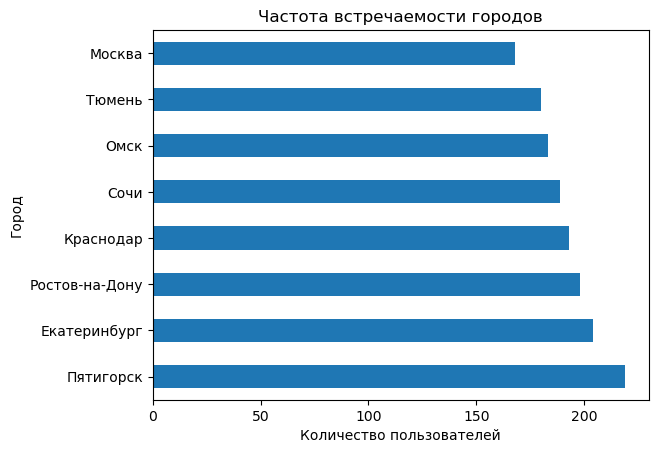

In [19]:
city_frequency_pivot.sort_values(by='amount', ascending=False).plot(kind='barh', y='amount', x='city', legend=False)
plt.title('Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.show()

**Вывод:** 
- Наибольшее количество пользователей - из Пятигорска, их 219. Далее следует Екатеринбург с показателем 204 пользователя.
- Наименьшее количество пользователей - из Москвы, их 168.

### Исследование соотношения пользователей с подпиской и без подписки

Сгруппируем данные датафрейма о пользователях по типам подписки и найдем количество пользователей с подписками `ultra` и `free`, а также их долю от общего количества. Результат сохраним в сводную таблицу. Визуализируем данные с помощью круговой диаграммы.

In [20]:
subscription_pivot = (users_df.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
                      .reset_index()
                      .rename(columns={'user_id': 'amount'}))
subscription_pivot['share'] = round((subscription_pivot['amount'] / subscription_pivot['amount'].sum()), 2)
subscription_pivot

,subscription_type,amount,share
0,free,835,0.54
1,ultra,699,0.46


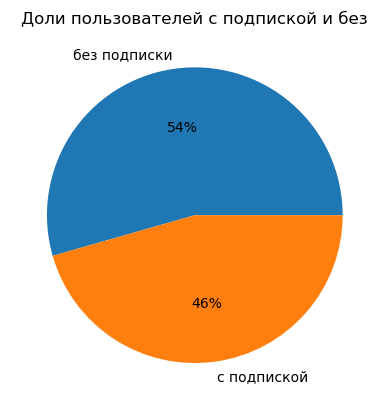

In [21]:
subscription_pivot.plot(kind='pie', y='amount', labels=['без подписки', 'с подпиской'], legend=False, autopct='%1.0f%%')
plt.title('Доли пользователей с подпиской и без')
plt.ylabel('')
plt.show()

**Вывод:** 835 пользователей (54%) не пользуются платной подпиской, а 699 (46%) пользуются.

### Исследование возраста пользователей

Сгруппируем данные датафрейма о пользователях по возрасту и найдем их долю от общего количества. Результат сохраним в сводную таблицу. Визуализируем данные с помощью столбчатой диаграммы.

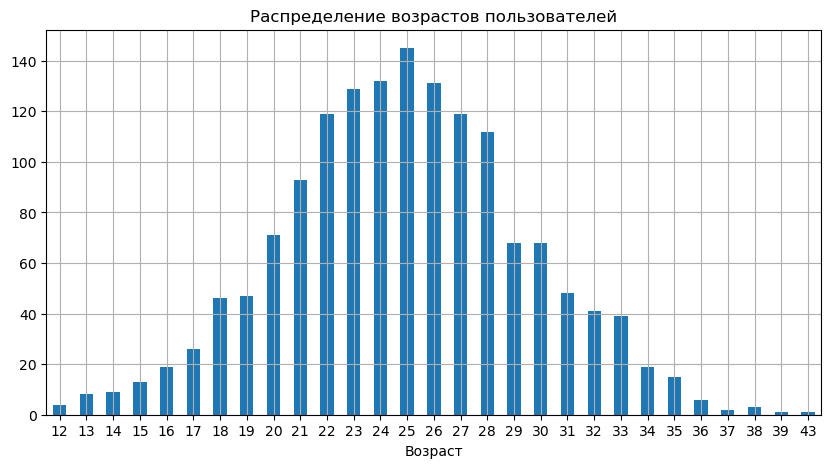

In [22]:
age_pivot = (users_df.pivot_table(index='age', values='user_id', aggfunc='count')
                      .reset_index()
                      .rename(columns={'user_id': 'amount'}))
age_pivot['share'] = round(age_pivot['amount'] / age_pivot['amount'].sum(), 2)
age_pivot.plot(kind='bar', y='amount', x='age', grid=True, figsize=(10, 5), legend=False)
plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.xticks(rotation=0)
plt.show()

Выведем 10 строк с данными о самых частых возрастах

In [23]:
age_pivot.sort_values(by='amount', ascending=False).head(10)

,age,amount,share
13,25,145,0.09
12,24,132,0.09
14,26,131,0.09
11,23,129,0.08
15,27,119,0.08
10,22,119,0.08
16,28,112,0.07
9,21,93,0.06
8,20,71,0.05
18,30,68,0.04


Выведем общее описание полученных данных

In [24]:
age_pivot['age'].describe()

count    29.000000
mean     26.103448
std       8.706914
min      12.000000
25%      19.000000
50%      26.000000
75%      33.000000
max      43.000000
Name: age, dtype: float64

**Вывод**:
- Распредедение возрастов пользователей близко к нормальному распределению со **средним 26 лет**, **стандартным отклонением 8.7**.
- Аномалии в данных отсутствуют.

### Исследование расстояния, пройденного в ходе поездок

Изучим данные о расстоянии, которое проезжают пользователи во время своих поездок. Для этого нам понадобится построить гистограмму столбца `'distance'` датафрейма `rides_df`, так как расстояние - непрерывная величина

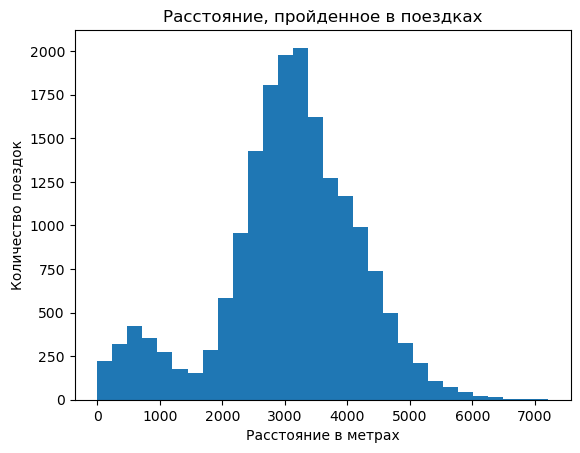

In [25]:
rides_df.plot(kind='hist', y='distance', bins=30, legend=False)
plt.title('Расстояние, пройденное в поездках')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

Выведем также общее описание данных

In [26]:
rides_df['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

**Вывод:**

- Пользователи сервиса в среднем проезжают **около 3070 метров**, это значение близко и к **медиане (3133 метра)** и к **среднему значению по выборке (3070 метров)**
- Обычно пользователь проезжают 3776 метров или меньше (в 75% случаев)
- Необычно долгие поездки - более 6500 метров, но они не выглядят аномально и не противоречат общей картине
- На гистограмме присутствует локальный пик в районе 500 метров, его существование может быть связано с тем, что у пользователей могут быть разные цели поездки: *доехать из точки А в точку В* или *покататься на маленькой дистанции*

### Исследование длительности поездок

Изучим данные о расстоянии, которое проезжают пользователи во время своих поездок. Для этого нам понадобится построить гистограмму столбца `'duration'` датафрейма `rides_df`, так как длительность поездок - непрерывная величина

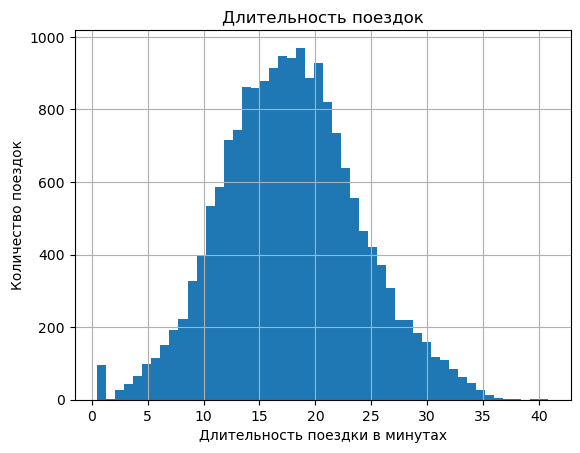

In [27]:
rides_df.plot(kind='hist', bins=50, y='duration', grid=True, legend=False)
plt.title('Длительность поездок')
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Количество поездок')
plt.show()

Распределение напоминает нормальное, но есть небольшой пик в районе 1 минуты. Изучим его более детально

In [28]:
rides_df.loc[rides_df['duration'] <= 1]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


За 30 секунд проехать 4 и более километра на самокате - физически невозможно, поэтому считаем данные аномальными. Найдем их долю среди всех данных

In [29]:
print(f'Доля аномальных значений {(len(rides_df.loc[rides_df["duration"] <= 1]) / len(rides_df["duration"])):.2%}')

Доля аномальных значений 0.53%


Аномалии занимают очень маленький процент от данных, отбросим их, чтобы не учитывать в результатах исследования

In [30]:
rides_df = rides_df.loc[rides_df["duration"] > 1]
print(f'Доля аномальных значений {(len(rides_df.loc[rides_df["duration"] <= 1]) / len(rides_df["duration"])):.2%}')

Доля аномальных значений 0.00%


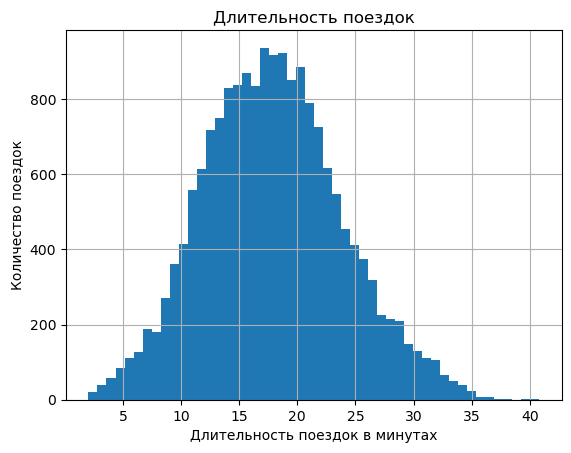

In [31]:
rides_df.plot(kind='hist', bins=50, y='duration', grid=True, legend=False)
plt.title('Длительность поездок')
plt.xlabel('Длительность поездок в минутах')
plt.ylabel('Количество поездок')
plt.show()

Аномалия устранена, теперь распределение ближе к нормальному.

In [32]:
rides_df['duration'].describe()

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

**Вывод:** 
- Распредедение длительности поездок близко к нормальному распределению со **средним 17 минут**, **стандартным отклонением почти 6 минут**. Медиана составляет также 17 минут.
- Аномалии в данных отсутствуют.

## Объединение данных и визуализация

### Объединение данных
Объединим данные о пользователях, поездках и подписках в один датафрейм. Для начала выведем количество строк датафрейма, к которому будем присоединять колонки

In [33]:
print(rides_df.shape[0])

17973


Теперь объединим датафреймы и выведем первые 5 строк получившегося датафрейма

In [34]:
data_general = rides_df.merge(users_df, how='left', on='user_id')
data_general = data_general.merge(subscriptions_df, how='left', on='subscription_type')
data_general.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Теперь выведем общую информацию о получившемся датафрейме, чтобы убедиться в отсутствии пропусков и в том, что не добавлено лишних строк

In [35]:
data_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            17973 non-null  int64         
 1   distance           17973 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               17973 non-null  datetime64[ns]
 4   month              17973 non-null  int32         
 5   name               17973 non-null  object        
 6   age                17973 non-null  int64         
 7   city               17973 non-null  object        
 8   subscription_type  17973 non-null  object        
 9   minute_price       17973 non-null  int64         
 10  start_ride_price   17973 non-null  int64         
 11  subscription_fee   17973 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


Пропусков, лишних строк не появилось. Можно двигаться дальше.

### Разделение данных о пользователях с подпиской и без
Для дальнейшего удобства, создадим два датафрейма - `ultra_df` и `free_df`. Они будут хранить в себе данные о поездках с платной подпиской и без нее соответственно.

Создадим датафрейм `ultra_df` и выведем на экран первые 5 строк 

In [36]:
ultra_df = data_general.loc[data_general['subscription_type'] == 'ultra'].reset_index(drop=True)
ultra_df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


Создадим датафрейм `free_df` и выведем на экран первые 5 строк 

In [37]:
free_df = data_general.loc[data_general['subscription_type'] == 'free'].reset_index(drop=True)
free_df.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
1,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
2,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
3,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
4,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0


### Визуализация информации о расстоянии и времени поездок с подпиской и без 

Для визуализации данных будем использовать гистограммы, как и ранее, так как расстояние и время - непрерывные величины.

Сначала проанализируем поездки с подпиской и без независимо, а далее проведем сравнение.

#### Поездки с подпиской
Рассмотрим сначала датафрейм `ultra_df`, он содержит информацию о поездках с подпиской. Построим гистограмму расстояния и выведем общее описание данных

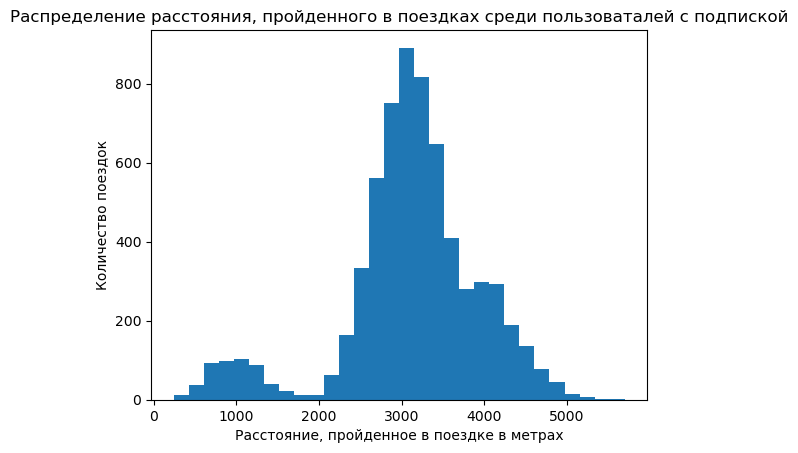

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

In [38]:
ultra_df.plot(kind='hist', y='distance', bins=30, legend=False)
plt.title('Распределение расстояния, пройденного в поездках среди пользоваталей с подпиской')
plt.xlabel('Расстояние, пройденное в поездке в метрах')
plt.ylabel('Количество поездок')
plt.show()
ultra_df['distance'].describe()

**Вывод:**
- Количество поездок - 6500
- Среднее значение - **3115 метров**, медиана - **3148 метров**. 
- В 75% поездок было пройдено **3560 метров** или меньше.
- На графике присутствует локальный пик в районе 1000 метров, но на аномалию этот пик не похож.

Теперь перейдем к **времени в поездке**. Построим для него гистограмму и выведем общую информацию

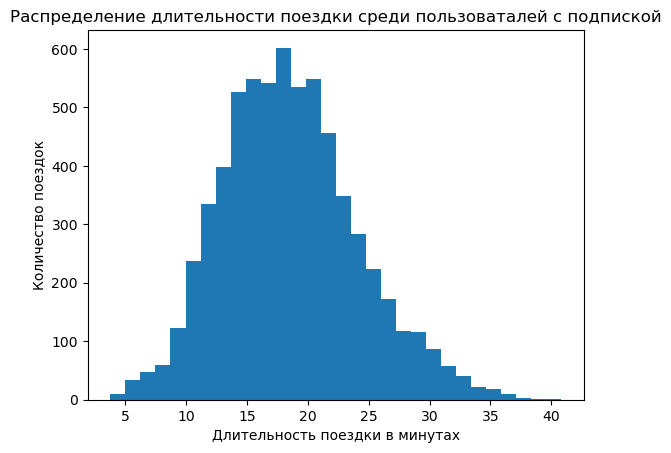

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [39]:
ultra_df.plot(kind='hist', y='duration', bins=30, legend=False)
plt.title('Распределение длительности поездки среди пользоваталей с подпиской')
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Количество поездок')
plt.show()
ultra_df['duration'].describe()

**Вывод:**
- Распределение времени в поездке близко к нормальному, со **средним 18.5 минут**, стандартное отклонение **5.5 минут**. Медианное значение **18 минут**.
- Более 75% поездок заканчиваются за 22 минуты или меньше

#### Поездки без подписки
Теперь рассмотрим датафрейм `free_df`, он содержит информацию о поездках без подписки. Построим гистограмму расстояния и выведем общее описание данных

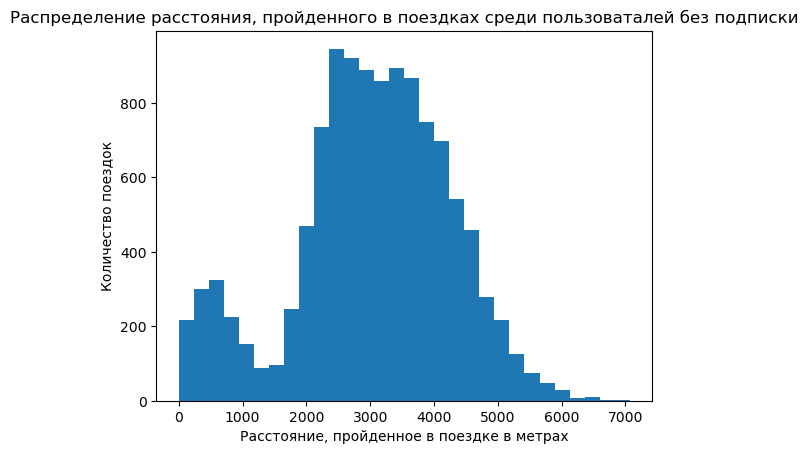

count    11473.000000
mean      3028.374239
std       1235.541051
min          0.855683
25%       2360.878149
50%       3102.083025
75%       3883.979311
max       7066.003772
Name: distance, dtype: float64

In [40]:
free_df.plot(kind='hist', y='distance', bins=30, legend=False)
plt.title('Распределение расстояния, пройденного в поездках среди пользоваталей без подписки')
plt.xlabel('Расстояние, пройденное в поездке в метрах')
plt.ylabel('Количество поездок')
plt.show()
free_df['distance'].describe()

**Вывод:**
- Количество поездок - 11473
- Среднее значение - **3028 метров**, медиана - **3102 метров**. 
- В 75% поездок было пройдено **3883 метра** или меньше.
- На графике присутствует локальный пик в районе 500 метров, но на аномалию этот пик не похож.

Теперь перейдем к **времени в поездке**. Построим для него гистограмму и выведем общую информацию

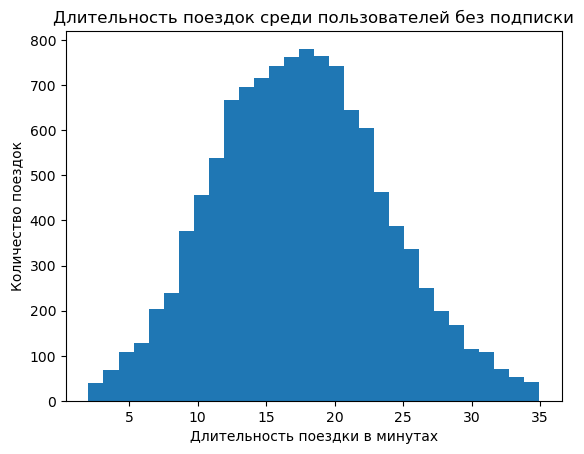

count    11473.000000
mean        17.530771
std          6.162609
min          2.035632
25%         13.085688
50%         17.383807
75%         21.638038
max         34.948498
Name: duration, dtype: float64

In [41]:
free_df.plot(kind='hist', y='duration', bins=30, legend=False)
plt.title('Длительность поездок среди пользователей без подписки')
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Количество поездок')
plt.show()
free_df['duration'].describe()

**Вывод:**
- Распределение близко к нормальному со **средним 17.5 минут**, стандартным отклонением 6.1, **медианой 17.4**
- 75% поездок длились не более 21 минуты

#### Сравнение (общий вывод к подразделу 4.3)

Для наглядности наложим распределения на один график

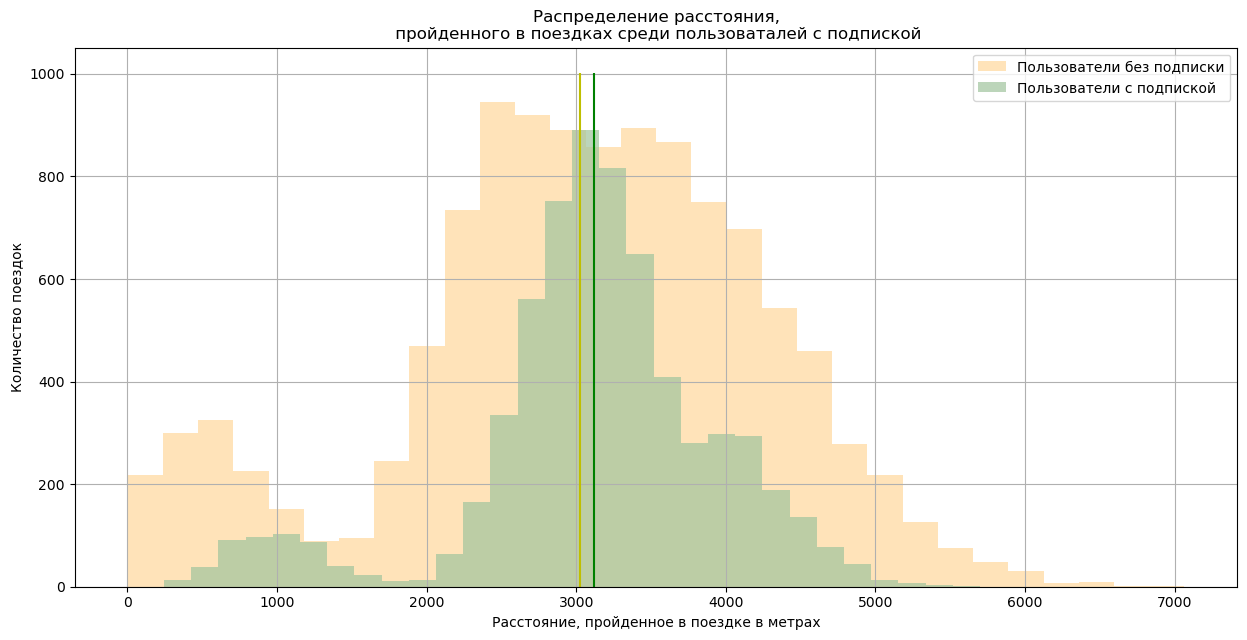

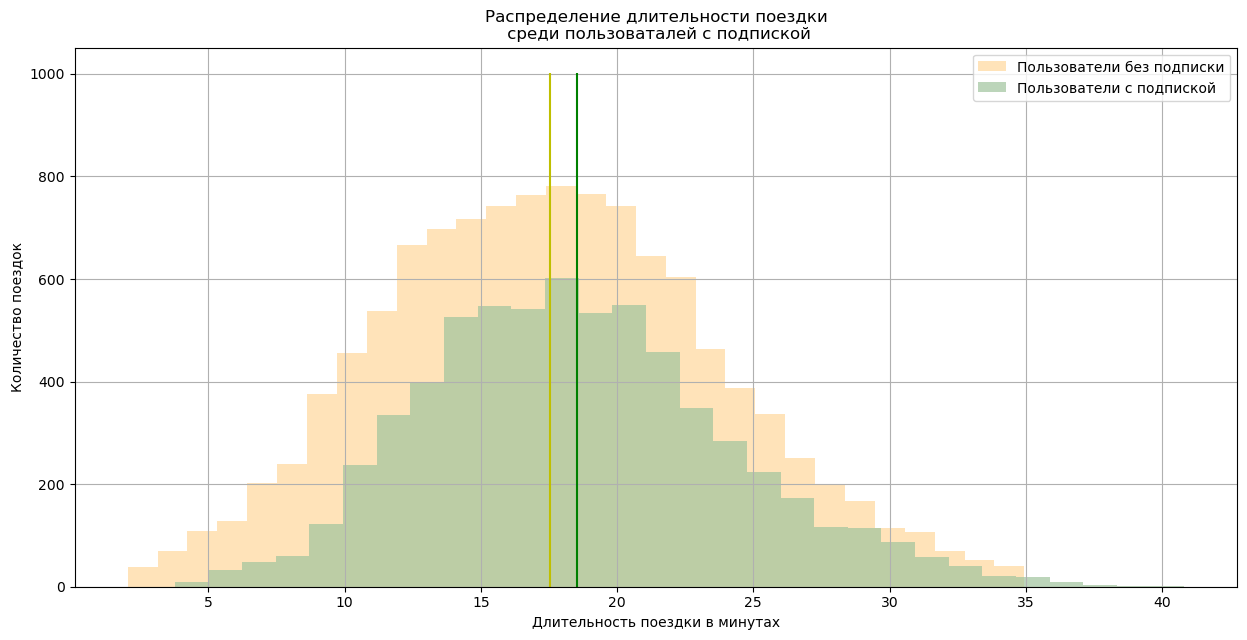

In [42]:
# Расстояние
plt.figure(figsize=(15, 7))
free_df['distance'].hist(bins=30, 
             color='#FFD89C', alpha=0.7, label='Пользователи без подписки')
ultra_df['distance'].hist(bins=30,
              color='#A0C49D', alpha=0.7, label='Пользователи с подпиской')
plt.vlines(x=free_df['distance'].mean(), ymin=0, ymax=1001, color='y')
plt.vlines(x=ultra_df['distance'].mean(), ymin=0, ymax=1001, color='g')
plt.title('Распределение расстояния,\n пройденного в поездках среди пользоваталей с подпиской')
plt.xlabel('Расстояние, пройденное в поездке в метрах')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

# Длительность
plt.figure(figsize=(15, 7))
free_df['duration'].hist(bins=30, 
             color='#FFD89C', alpha=0.7, label='Пользователи без подписки')
ultra_df['duration'].hist(bins=30,
              color='#A0C49D', alpha=0.7, label='Пользователи с подпиской')
plt.vlines(x=free_df['duration'].mean(), ymin=0, ymax=1001, color='y')
plt.vlines(x=ultra_df['duration'].mean(), ymin=0, ymax=1001, color='g')
plt.title('Распределение длительности поездки\n среди пользоваталей с подпиской')
plt.xlabel('Длительность поездки в минутах')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

- Поездок без подписок почти в 2 раза больше (6500 с подпиской и 115473 без)
- **Среднее расстояние** у поездок с подписками немного выше *(3115 против 3028 метров)*, это может быть связано с тем, что среди поездок без подписки есть некоторое количество поездок с расстоянием **менее 500** метров. Медианы почти не отличаются. В 75% поездок с подписками было пройдено **3560 метров** или меньше, а в 75% поездок без подписки расстояние было **3883**, это значительная разница
- **Средняя длительность** поездок с подписками почти на 1 минуту больше, чем без подписок *(18.5 против 17.5)*, медианная на 0.7 минуты больше *(18.1 против 17.4)*. 75% поездок с подпиской завершены за 22 минуты или меньше, а без подписки - 21.6 минут или меньше, разница не так значительна.

## Подсчет выручки


Составим таблицу, в которой вычислим суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. До этого предварительно округлим до ближайшего большего целого числа значения длительности поездок в исходном датафрейме.

Также добавим вспомогателный столбец с типом подписки, а также из датафрейма с данными о подписках добавим в получившуюся таблицу информацию о стоимости минуты, старта и подписки *(это нужно для подсчета выручки)*. Выведем первые 5 строк 

In [43]:
# Округлим длительность поездок
data_general['duration'] = np.ceil(data_general['duration'])

revenue_pivot = (data_general
                 .pivot_table(index=['user_id', 'month'],
                              values=['distance', 'duration'],
                              aggfunc=['sum', 'count']).reset_index())
revenue_pivot.columns = ['user_id', 'month', 'distance', 'duration', 'amount', 'subscription_type']

# Добавим столбец с типом подписки
revenue_pivot.loc[revenue_pivot['user_id'].isin(ultra_df['user_id']), 'subscription_type'] = 'ultra'
revenue_pivot.loc[revenue_pivot['user_id'].isin(free_df['user_id']), 'subscription_type'] = 'free'
revenue_pivot = revenue_pivot.merge(subscriptions_df, how='left', on='subscription_type')

revenue_pivot.head()

/var/folders/m0/94b7zrt17lv3szp310d4y2bh0000gn/T/ipykernel_58105/3785943452.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ultra' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  revenue_pivot.loc[revenue_pivot['user_id'].isin(ultra_df['user_id']), 'subscription_type'] = 'ultra'


,user_id,month,distance,duration,amount,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,42.0,2,ultra,6,0,199
1,1,4,754.159807,7.0,1,ultra,6,0,199
2,1,8,6723.470560,46.0,2,ultra,6,0,199
3,1,10,5809.911100,32.0,2,ultra,6,0,199
4,1,11,7003.499363,56.0,3,ultra,6,0,199


Добавим в получившуюся таблицу столбец `'revenue'`, который будет хранить информацию о суммарной выручке за месяц. Выведем на экран первые 5 строк

In [44]:
revenue_pivot['revenue'] = (revenue_pivot['duration'] * revenue_pivot['minute_price'] 
                            + revenue_pivot['start_ride_price'] * revenue_pivot['amount'] 
                            + revenue_pivot['subscription_fee'])
revenue_pivot.head()

,user_id,month,distance,duration,amount,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.511294,42.0,2,ultra,6,0,199,451.0
1,1,4,754.159807,7.0,1,ultra,6,0,199,241.0
2,1,8,6723.470560,46.0,2,ultra,6,0,199,475.0
3,1,10,5809.911100,32.0,2,ultra,6,0,199,391.0
4,1,11,7003.499363,56.0,3,ultra,6,0,199,535.0


## Статистический анализ данных

В текущем разделе будет проведен статистический анализ данных, чтобы получить ответы на вопросы:

6.1 Тратят ли пользователи с подпиской больше времени на поездки? 

6.2 Превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 метров?

6.3 Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

6.4 *Дополнительный вопрос:* Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

### Тратят ли пользователи с подпиской больше времени на поездки?

Для ответа на вопрос, сформулируем нулевую и альтернативную гипотезы для дальнейшей проверки:
- **Нулевая гипотеза (H0)**: Пользователи с подпиской тратят столько же времени на поездки, как и пользователи без подписки
- **Альтернативная гипотеза (H1)**: Пользователи с подпиской тратят больше времени на поездки

Для того, чтобы проверить выдвинутые гипотезы, проведем двухвыборочный правосторонний Т-тест для независимых выборок. Уровень статистической значимости установим на уровне 0.01.

In [45]:
alpha = 0.01
duration_comparement = st.ttest_ind(ultra_df['duration'], free_df['duration'], alternative='greater')

print(f'Значение p-value: {duration_comparement.pvalue}')
if duration_comparement.pvalue < alpha:
    print('Имеем достаточные основания отклонить H0')
else:
    print('Не имеем достаточных оснований отклонить H0 в пользу H1')

Значение p-value: 4.704468074453899e-28
Имеем достаточные основания отклонить H0


**Вывод:** Статистически доказано, что есть достаточные основания отклонить гипотезу о равенстве средних расстояний в пользу альтернативной правосторонней гипотезы, что среднее расстояние у пользователей с подпиской больше, чем у пользователей без подписки.

### Превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 метров?

Для ответа на вопрос, сформулируем нулевую и альтернативную гипотезы:
- **Нулевая гипотеза (H0)**: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров.
- **Альтернативная гипотеза (H1)**: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

Для того, чтобы проверить выдвинутые гипотезы, проведем одновыборочный правосторонний Т-тест. Уровень статистической значимости установим на уровне 0.01

In [46]:
h0_distance = 3130
distance_test = st.ttest_1samp(ultra_df['distance'], h0_distance, alternative='greater')

print(f'P-value: {distance_test.pvalue}')
if distance_test.pvalue < alpha:
    print('Имеем достаточные основания отклонить H0')
else:
    print('Не имеем достаточных оснований отклонить H0 в пользу H1')

P-value: 0.9195368847849785
Не имеем достаточных оснований отклонить H0 в пользу H1


Так как мы получили p-value равное почти 0.92, мы не можем отвергнуть нулевую гипотезу о равенстве в пользу H1.

**Вывод:**
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
- Износ самокатов оптимален.

### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Для ответа на вопрос, сформулируем нулевую и альтернативную гипотезы:
- **Нулевая гипотеза (H0)**: Средняя выручка по месяцам от пользователей с подпиской равна средней выручке по месяцам от пользователей без подписки
- **Альтернативная гипотеза (H1)**: Средняя выручка по месяцам от пользователей с подпиской больше средней выручке по месяцам от пользователей без подписки

Для того, чтобы проверить выдвинутые гипотезы, проведем двухвыборочный правосторонний Т-тест для независимых выборок. Уровень статистической значимости установим на уровне 0.01

In [47]:
# Проверка гипотезы
revenue_test = (st.ttest_ind
                (revenue_pivot.loc[revenue_pivot['subscription_type'] == 'ultra', 'revenue'],
                revenue_pivot.loc[revenue_pivot['subscription_type'] == 'free', 'revenue'], 
                alternative='greater')
               )
print(f'P-value: {revenue_test.pvalue}')
if revenue_test.pvalue < alpha:
    print('Имеем основания отвергнуть H0')
else:
    print('Не имеем достаточно оснований отвергнуть H0 в пользу H1')

P-value: 2.0314113674863288e-30
Имеем основания отвергнуть H0


**Вывод:** 
- Статистически доказано, что есть основания отвергнуть гипотезу о равенстве выручки в пользу правосторонней альтернативной гипотезы (средняя помесячная выручка пользователей с подпиской выше, чем без подписки)
- Пользователи с подпиской приносят больше выручки, а значит они выгоднее

### Ответ на вопрос

Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

Сформулируем гипотезу и альтернативную:
- **Нулевая гипотеза (H0)**: Количество обращений в техподдержку после обновления серверов не изменилось
- **Альтернативная гипотеза (H1)**: Количество обращений в техподдержку после обновления серверов снизилось

Так как предполагается, что над выборкой будут произведены некоторые действия, и полученную в результате выборку необходимо будет сравнить с первоначальной, подойдет двухвыборочный правосторонний Т-тест для зависимых выборок. Он проводится с помощью метода `scipy.stats.ttest_rel(sample_before, sample_after, alternative='greater')`.

**Общий вывод к Проверке гипотез:**
- Так как статистически доказано, что есть достаточные основания отклонить гипотезу о равенстве средних расстояний в пользу альтернативной правосторонней гипотезы, что среднее расстояние у пользователей с подпиской больше, чем у пользователей без подписки, **пользователи с подпиской выгоднее, чем без подписки**
- Так как у нас недостаточно оснований отвергнуть гипотезу о равенстве среднего расстояния в поездке оптимальному значению 3130 метров, но достаточно оснований отклонить ее в пользу левосторонней гипотезы при значении 3140 метров, можно заключить, что износ самокатов не минимален.
- Так как статистически доказано, что есть основания отвергнуть гипотезу о равенстве выручки в пользу правосторонней альтернативной гипотезы (средняя помесячная выручка пользователей с подпиской выше, чем без подписки), пользователи с подпиской будут приносить больше денег

## Распределения

### Найти количество писем, при отправке которого вероятность получить 100 продлений около 5%

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%.

Для этого подберем соответствующий параметр `n` для биномиального распределения, а далее рассчитаем с помощью функции `cdf()` вероятность хвоста слева от 100 продлений, она должна быть около 0.05. Используем аппроксимацию нормальным распределением.

In [48]:
# Зададим распределение
success_prob = 0.1
n = 100
goal_amount = 100

goal_prob = 1

while round(goal_prob, 2) > 0.05:
    n += 1
    mu = n * success_prob
    sigma = np.sqrt(n*success_prob*(1-success_prob))
    renewal_distr = st.norm(mu, sigma)
    goal_prob = renewal_distr.cdf(100)

print(f'Вероятность левого хвоста от 100: {renewal_distr.cdf(goal_amount)} достигается при N равном {n}')

Вероятность левого хвоста от 100: 0.054543717104487396 достигается при N равном 1164


Построим график распределения

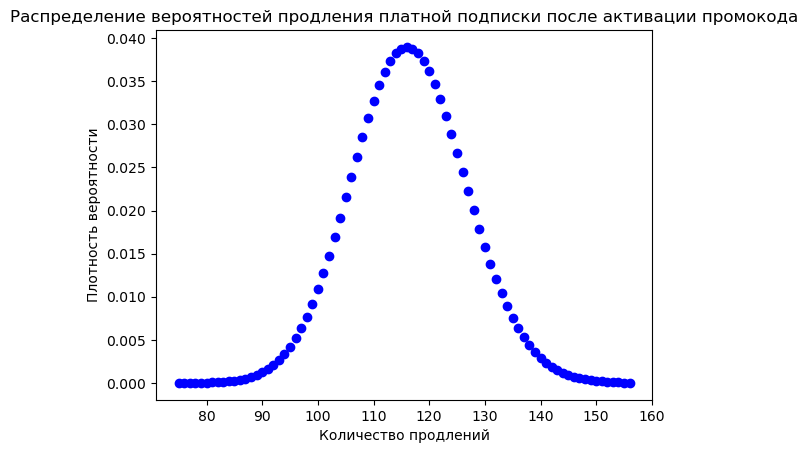

In [49]:
x = list(range(max(0, int(mu - 4 * sigma)), int(mu + 4 * sigma)))
plt.plot(x, st.binom.pmf(x, n, success_prob), 'bo')
plt.title('Распределение вероятностей продления платной подписки после активации промокода')
plt.xlabel('Количество продлений')
plt.ylabel('Плотность вероятности')
plt.show()

**Вывод:** При отправке 1164 промокодов вероятность получить менее 100 продлений около 0.05 *(вероятность выполнить план - 100 продлений примерно 95%, как в условии)*

### Оценка вероятности открытия 399.5 тысяч уведомлений из 1 миллиона отправленных 

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения

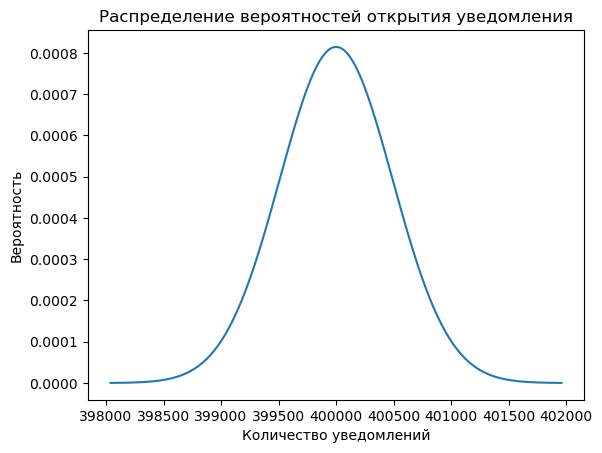

In [50]:
success_prob = 0.4
n = 1000000
goal_amount = 399500

mu = n * success_prob
sigma = np.sqrt(n*success_prob*(1-success_prob))

x = list(range(max(0, int(mu - 4 * sigma)), int(mu + 4 * sigma)))

graph = plt.plot(x, st.binom.pmf(x, n, success_prob))
plt.title('Распределение вероятностей открытия уведомления')
plt.xlabel('Количество уведомлений')
plt.ylabel('Вероятность')
plt.show()

А теперь оценим вероятность левого хвоста от 399.5 с помощью функции `cdf()`

In [51]:
openning_distr = st.norm(mu, sigma)
print(f'Вероятность, что откроют не более 399.5 тысяч писем: {openning_distr.cdf(399500)}')

Вероятность, что откроют не более 399.5 тысяч писем: 0.15371708296369768


**Вывод:** Вероятность, что письма откроют не более 399.5 тысяч пользователей составляет **0.15**

**Общий вывод по Распределениям:**
- Чтобы вероятность выполнить план по 100 продлениям после акции с отправкой промокодов на месяц бесплатной подписки составляла 95%, необходимо отправить **1164 промокода**
- Вероятность, что из 1 миллиона отправленных в мобильном приложении уведомлений, будут открыты не более 399.5 тысяч, составляет **0.15**

## Общий вывод

### Предобработка данных
- Проведена проверка на отсутствие пропусков в данных
- Столбец `'date'` датафрейма `rides_df` приведен к формату datetime
- Устранены неявные дубликаты в столбце `'name'` датафрейма `users_df`

### Исследовательский анализ данных
- Из данных исключены поездки с аномально маленькой длительностью и большим расстоянием (0.5 минут и 4000 метров)
- Проанализирована частота встречаемости городов среди пользователей. Наибольшее количество пользователей - из **Пятигорска, их 219**. Далее следует **Екатеринбург с показателем 204** пользователя. Наименьшее количество пользователей - из **Москвы, их 168**.
- Проанализировано количество пользоваталей с подпиской и без, а также их доля среди общего количества пользоваталей: **835 пользователей (54%) не пользуются платной подпиской**, а **699 (46%) пользуются**.
- Проанализированы данные о возрасте пользователей: Распредедение возрастов пользователей близко к нормальному распределению **со средним 26 лет**, стандартным отклонением 8.7. Убедились, что в данных о возрасте отсутствуют аномалии.
- Исследованы данные о расстоянии, которое проезжают пользователи во время поездки. Пользователи сервиса в среднем проезжают **около 3100 метров**, это значение близко и к **медиане (3133 метра)** и к **среднему значению по выборке (3070 метров)**.
- Исследованы данные о длительности поездок. Распредедение длительности поездок близко к нормальному распределению со **средним 17 минут**, **стандартным отклонением почти 6 минут**. Медиана составляет также 17 минут. Устранена аномалия (ряд поездок с расстоянием 4 километра и более, и временем 0.5 минуты).

### Объединение данных и визуализация
- Создан новый датафрейм, который содержит объединенные данные о пользователях, поездках и подписках.
- Создано два датафрейма, которые содержат полную информацию о всех поездках пользователей с подпиской и без подписки
- Проведена визуализация распределений длительности и расстояния в разрезе поездок с подпиской и без
- Проведено сравнение длительности и расстояния в разрезе поездок с подпиской и без: 
    - Поездок без подписок почти в 2 раза больше (6500 с подпиской и 11473 без)
    - **Среднее расстояние** у поездок с подписками немного выше *(3115 против 3028 метров)*, это может быть связано с тем, что среди поездок без подписки есть некоторое количество поездок с расстоянием **менее 500** метров. Медианы почти не отличаются. В 75% поездок с подписками было пройдено **3560 метров** или меньше, а в 75% поездок без подписки расстояние было **3883**, это значительная разница
    - **Средняя длительность** поездок с подписками почти на 1 минуту больше, чем без подписок *(18.5 против 17.5)*, медианная на 0.7 минуты больше *(18.1 против 17.4)*. 75% поездок с подпиской завершены за 22 минуты или меньше, а без подписки - 21.6 минут или меньше, разница не так значительна.

### Проверка статистических гипотез
- Так как статистически доказано, что есть достаточные основания отклонить гипотезу о равенстве средних расстояний в пользу альтернативной правосторонней гипотезы, что среднее расстояние у пользователей с подпиской больше, чем у пользователей без подписки, **пользователи с подпиской выгоднее, чем без подписки**. Рекомендация: чтобы увеличить выручку и вырасти как бизнес, стоит увеличить количество пользоваталей с подпиской. Например, при помощи маркетинговой акции.
- Так как у нас недостаточно оснований отвергнуть гипотезу о равенстве среднего расстояния в поездке оптимальному значению 3130 метров, но достаточно оснований отклонить ее в пользу левосторонней гипотезы при значении 3140 метров, можно заключить, что **износ самокатов не минимален**.
- Так как статистически доказано, что есть основания отвергнуть гипотезу о равенстве выручки в пользу правосторонней альтернативной гипотезы (средняя помесячная выручка пользователей с подпиской выше, чем без подписки), **пользователи с подпиской будут приносить больше денег**.

### Распределения
- Чтобы вероятность выполнить план по 100 продлениям после акции отдела маркетинга с отправкой промокодов на месяц бесплатной подписки составляла 95%, необходимо отправить **1164 промокода**
- Вероятность, что из 1 миллиона отправленных в мобильном приложении уведомлений отделом маркетинга, будут открыты не более 399.5 тысяч, составляет **0.15 или 15%**